In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [13]:
wine= pd.read_csv("C:/Users/amogh/Desktop/winequalityN.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df=wine.groupby('type')

white= df.get_group('white')


In [15]:
white= white.drop('type', axis= 1)
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


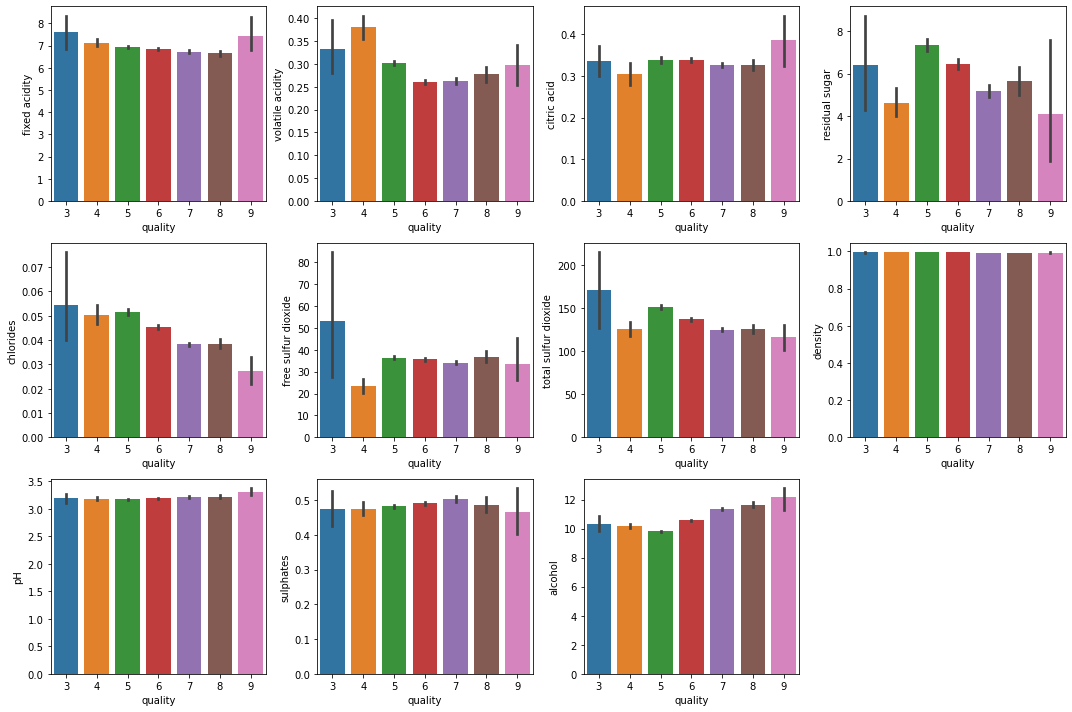

In [17]:
#plotting

fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=white)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=white)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=white)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=white)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=white)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=white)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=white)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=white)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=white)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=white)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=white)

plt.tight_layout()

#### Inferences:

Quality is high when:
1. Chlorides are less
2. Sulphur dioxide is less
3. Sulphates are slightly less
3. Alcohol is more


In [18]:
white['quality'].value_counts()    

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#### Inference: 
6 is the most frequently occuring score, followed by 5, and 7 hence  6.5+ would be good, 5-6.5 as average, and below 5 as poor

In [19]:
grades= ['A', 'B', 'C']
ranges= (1,5,6,10)
white['grade']= pd.cut(white['quality'], bins= ranges, labels= grades)
#white.tail()

le= LabelEncoder()
white['grade']= le.fit_transform(white['grade'])
#white.tail()

white['grade'].value_counts()


1    2198
0    1640
2    1060
Name: grade, dtype: int64

In [20]:
white.corr()['grade'].sort_values(ascending=False)

grade                   1.000000
quality                 0.949061
alcohol                 0.463165
pH                      0.105746
sulphates               0.060044
free sulfur dioxide    -0.013977
citric acid            -0.020291
fixed acidity          -0.103741
residual sugar         -0.125273
volatile acidity       -0.183219
total sulfur dioxide   -0.201185
chlorides              -0.221429
density                -0.332495
Name: grade, dtype: float64

### Inference
On checking for correlation what we can infer is that grade is higher when:
1. pH is slightly acidic
2. alcohol is more
3. slightly less citric acid content
4. less amount of fixed acidity
5. less chlorides, density,residual sugars and total sulphur dioxide

### Modelling



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer= SimpleImputer()

X= white.drop('grade', axis= 1)
y= white['grade']


X= pd.DataFrame(imputer.fit_transform(X))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=101)

In [11]:
#linear regression

model2= LinearRegression()
model2.fit(X_train, y_train)

print(model2.predict(X_test))
print(X_train)

model2.score(X_test, y_test)


[0.24173917 1.80851983 0.2339564  ... 1.78496671 1.00321697 0.13188422]
       0      1     2     3      4     5      6        7     8     9     10  \
999   7.6  0.210  0.60   2.1  0.046  47.0  165.0  0.99360  3.05  0.54  10.1   
1207  6.4  0.300  0.38   7.8  0.046  35.0  192.0  0.99550  3.10  0.37   9.0   
3756  5.5  0.170  0.23   2.9  0.039  10.0  108.0  0.99243  3.28  0.50  10.0   
215   5.8  0.260  0.24   9.2  0.044  55.0  152.0  0.99610  3.31  0.38   9.4   
429   7.1  0.310  0.47  13.6  0.056  54.0  197.0  0.99780  3.10  0.49   9.3   
...   ...    ...   ...   ...    ...   ...    ...      ...   ...   ...   ...   
4079  5.4  0.265  0.28   7.8  0.052  27.0   91.0  0.99432  3.19  0.38  10.4   
4171  6.6  0.220  0.37   1.6  0.040  31.0  101.0  0.99009  3.15  0.66  12.0   
599   6.9  0.190  0.40   1.4  0.036  14.0   55.0  0.99090  3.08  0.68  11.5   
1361  6.0  0.130  0.28   5.7  0.038  56.0  189.5  0.99480  3.59  0.43  10.6   
1547  6.7  0.300  0.49   4.8  0.034  36.0  158.0  0.99450  

0.9049919778164162